# Bifurcations on the real line

A **Bifurcation** is the qualitative change in a dynamical system as its paremeters change

### Three kinds of bifurcations on the real line
1. **Saddle-node** bifurcation: creation or destruction of a pair of fixed points as a parameter is varied
2. **Transcritical** bifurcation
3. **Pitchfork** bifurcation

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [3]:
def graph_bifurcation_diafram(r, r_select, xmin, xmax):
    pass

In [4]:
def r(x): return -x ** 2

The bifurcation points of $\dot x = f(x, r) = f_r(x)$ occur when
1. there are changes of stability for the set of fixed points, and
2. the potential local changes of stability of the fixed point

That is, the bifurcation points of $\dot x = f(x, r) = f_r(x)$ occur when
1. $f_r(x) = 0$
2. $f'_r(x) = 0$

## Bifurcation Diagram

> A bifurcation diagram for a system on the real line is a graph in the $xr$-plane representing the varying pattern of fixed points for the system $\dot x = f_r(x)$ and their stabilities

### Example (I)

$$
\dot x = r + x
$$

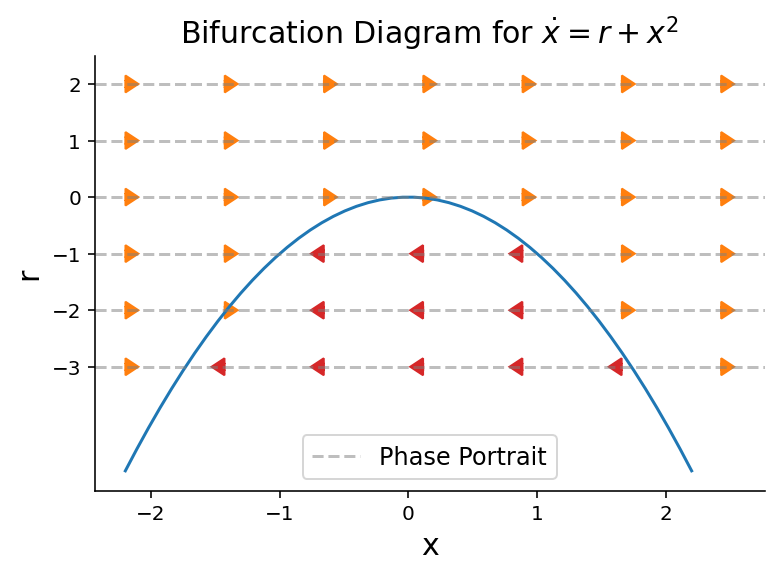

In [5]:
r_select = [-3, -2, -1, 0, 1, 2]
xmin, xmax = -2.2, 2.2
x = np.linspace(xmin, xmax)
n_arrows = 7
step = (xmax - xmin + 1) / n_arrows
arrow_points = xmin + step * np.arange(n_arrows)

fig, ax = plt.subplots()
ax.plot(x, r(x))
for ri in r_select:
    line = ax.axhline(y=ri, c="tab:gray", linestyle="--", alpha=0.5)
    fxr = arrow_points ** 2 + ri
    for xval, rval in zip(arrow_points, fxr):
        position = np.sign(rval)
        if position != 0:
            color = "tab:orange" if position == 1 else "tab:red"
            plt.arrow(xval, ri, position * 0.001,
                      0, width=0.1, head_width=0.3,
                      color=color, head_length=0.1)


ax.set_yticks(r_select)
ax.legend([line], ["Phase Portrait"], fontsize=12)    
ax.set_title(r"Bifurcation Diagram for $\dot x= r + x^2$", fontsize=15)
ax.set_xlabel("x", fontsize=15)
ax.set_ylabel("r", fontsize=15);

### Example (II)

$$
\dot x = r - x - \exp(-x)
$$

In [6]:
def f(x, r): return r - x - np.exp(-x)

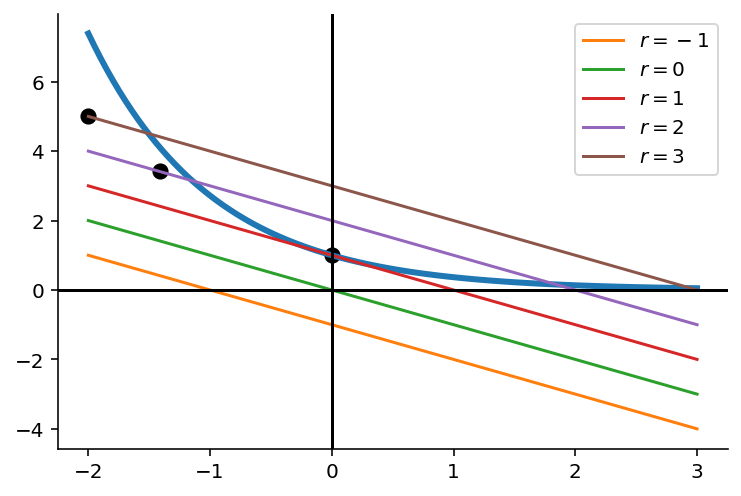

In [7]:
def g(x, r): return r - x
def h(x): return np.exp(-x)

xrange = np.linspace(-2, 3, 100)
rvalues = np.arange(-1, 4, 1)
plt.plot(xrange, h(xrange), linewidth=3)
for r in rvalues:
    plt.plot(xrange, g(xrange, r), label=f"$r={r}$")
    if r > 0:
        x1_star, x2_star = np.array([-1, 1]) * np.sqrt(2 * (r - 1))
        plt.scatter(x1_star, g(x1_star, r), c="black", s=50)
plt.legend()
plt.axhline(y=0, c="black")
plt.axvline(x=0, c="black")

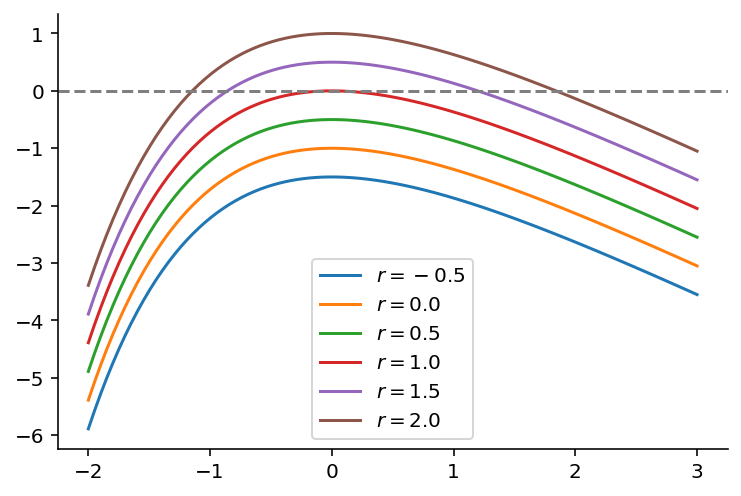

In [8]:
xrange = np.linspace(-2, 3, 100)
rvalues = np.arange(-0.5, 2.5, 0.5)
for r in rvalues:
    plt.plot(xrange, f(xrange, r), label=f"$r={r}$")
plt.axhline(y=0, c="tab:gray", linestyle="--")
plt.legend(fontsize=10)

In [9]:
r = 2
x = -0.1

In [10]:
x = -1.1
for _ in range(100):
    y = np.exp(-x)
    x = r - y
    

(x, y)

(1.8414056604369606, 0.15859433956303937)

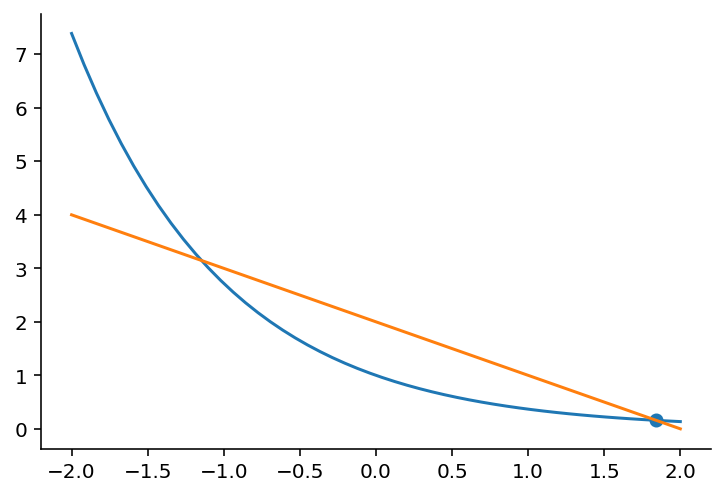

In [11]:
xrange = np.linspace(-2, 2)
plt.plot(xrange, np.exp(-xrange))
plt.plot(xrange, r - xrange)
plt.scatter(x, y)

<h2 style="color:crimson">Saddle-node Bifurcations</h2>

Let $\dot x= f(x, r)$. The pair $(x^*, r_c)$ is a **saddle-node bifurcation** point for the system $\dot x$ if

$$
\begin{aligned}
f(x^*, r_c) &= 0\\
\frac{d}{dx}f(x^*, r_c) &=0
\end{aligned}
$$

---

If a dynamical system on the real line contains points  $(x^*, r_x)$ for which the above conditions hold true, then it is locally behaving quadratically. Thus, by stading at $x^*$ and varying $r_c$, fixed points will be either created or destroyed. That is, a bifurcation is happening at $(x^*, r_c)$.

### Example
Consider the system

$$
    \dot x = \sin(x) + r; \ \forall x \in [0, 2\pi]
$$

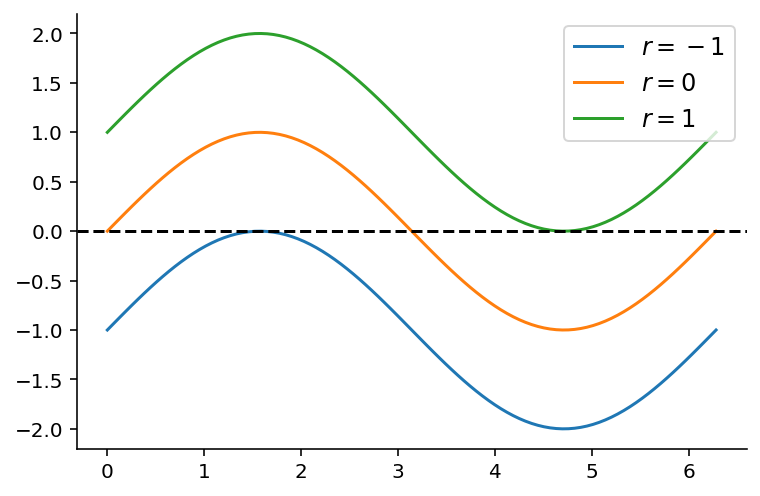

In [12]:
xrange = np.linspace(0, 2 * np.pi, 100)

r_values = np.array([-1, 0, 1])
def f(x, r):
    return np.sin(x)[:, None] + r[None, :]

l = plt.plot(xrange, f(xrange, r_values))
plt.axhline(y=0, c="black", linestyle="--")
plt.legend(l, [f"$r={r}$" for r in r_values], fontsize=12);

For the previously defined system, the **saddle-node** bifurcation equations hold true at 

$$
x^* = \frac{n\pi}{2}; \text{$n$ is odd}
$$

$$
    r = -\sin\left(x^*\right)
$$

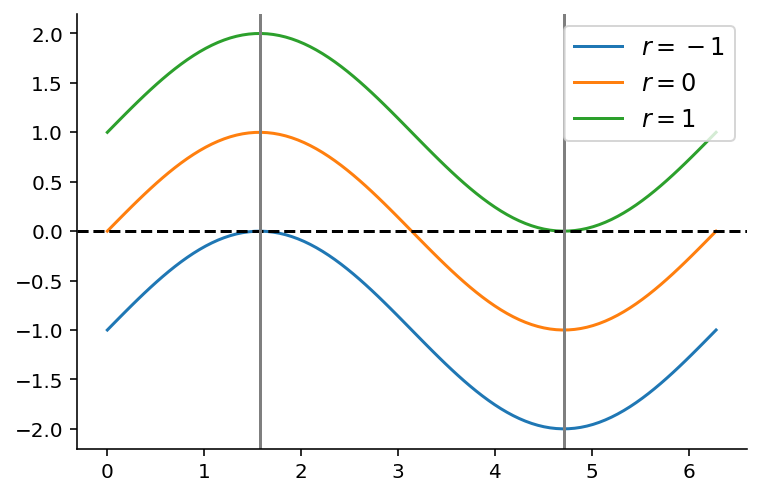

In [13]:
x_star = np.array([1, 3]) * np.pi / 2
rc = -np.sin(x_star)

l = plt.plot(xrange, f(xrange, r_values))
plt.axhline(y=0, c="black", linestyle="--")
plt.legend(l, [f"$r={r}$" for r in r_values], fontsize=12);
for x in x_star:
    plt.axvline(x=x, c="tab:gray")

<h2 style="color:crimson">Pitchfork Bifurcation</h2>

In [165]:
def f_sup(v):
    r, x = v
    return r * x - x ** 3

def f_sub(v):
    r, x = v
    return r * x + x ** 3

In [166]:
mesh = np.mgrid[-1:2:0.01, -2: 2:0.01]
sup_bifurcation_values = np.apply_along_axis(f_sup, 0, mesh)
sub_bifurcation_values = np.apply_along_axis(f_sub, 0, mesh)

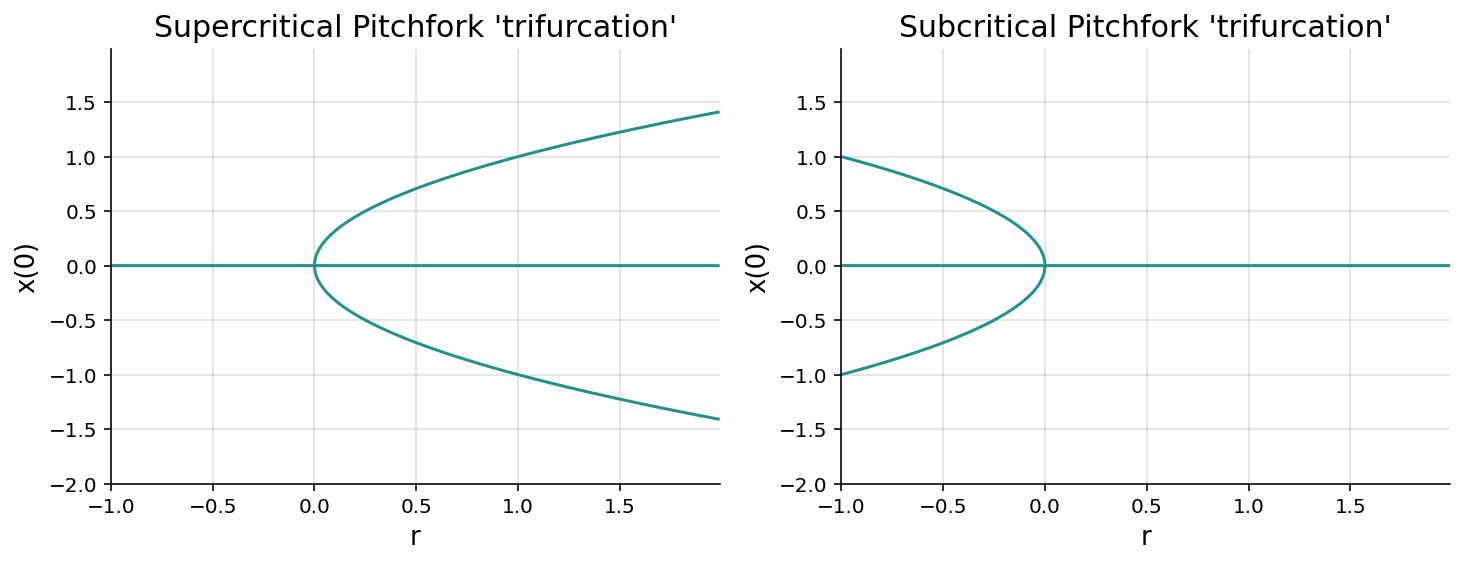

In [167]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
types = ["Supercritical", "Subcritical"]
funcs = [f_sup, f_sub]

for axi, f, type in zip(ax, funcs, types):
    bifurcation_values = np.apply_along_axis(f, 0, mesh)
    axi.contour(*mesh, bifurcation_values, levels=1)
    axi.set_xlabel("r", fontsize=13)
    axi.set_ylabel("x(0)", fontsize=13)
    axi.set_title(f"{type} Pitchfork 'trifurcation'", fontsize=15)
    axi.grid(alpha=0.4)

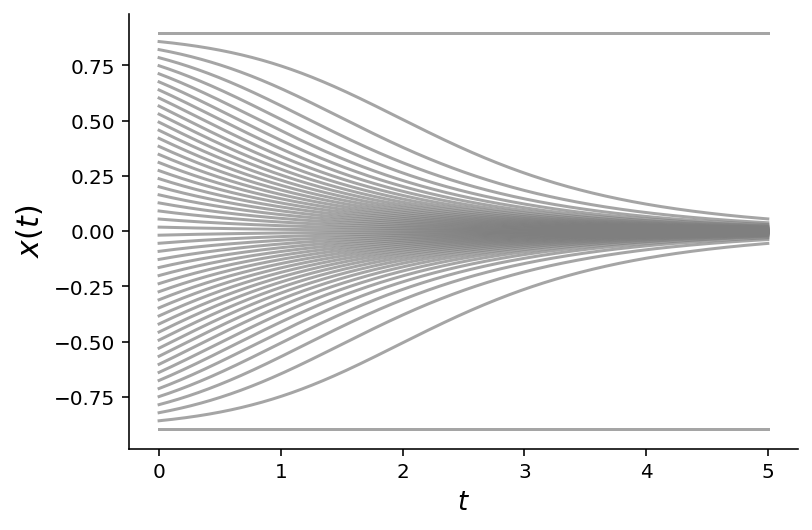

In [169]:
t = np.linspace(0, 5, 1000)

r = -0.8
def f_sub(x, t):
    return r * x + x ** 3

lim = np.sqrt(-r)
x0_values = np.linspace(-lim, lim)
I = odeint(f_sub, x0_values, t)

plt.plot(t, I, color="tab:gray", alpha=0.7);
plt.ylabel("$x(t)$", fontsize=15)
plt.xlabel("$t$", fontsize=13);